# Custom Components: Toy Example

Requirements for Haystack componenets:

-  a class with the `@component` decorator
- a `run()` method with a `@component.output_types` decorator
- returns a dictionary

**Abstract Example:**

```
from haystack import component

@component
class Translator:

    @component.output_types(documents=List[Document])
    def run(self,
            from_lang: str = "en",
            to_lang: str = "fr",
            documents:List[Document]):
    
    translated_documents = []
    # translate documents from from_lang to to_lang
    # add them to translated_documents
    return {"documents": translated_documents}
```

### Preliminaries

Since we will use the `OpenAIGenerator` component, we need to make the correspondig API key accessible via environment.

In [2]:
from dotenv import load_dotenv
load_dotenv()

True

### Create a first Custom Component



In [1]:
from haystack import component

@component
class Greeter:

    @component.output_types(greeting=str)
    def run(self, user_name: str):
        return {"greeting": f"Hello {user_name}"}
    
greeter = Greeter()
greeter.run(user_name="Andreas")



{'greeting': 'Hello Andreas'}

### Add the Custom Component to a Dialogue Builder Pipeline

In [2]:
from haystack import Pipeline
from haystack.components.builders import PromptBuilder
from haystack.components.generators import OpenAIGenerator

template="""You will be given the beginning of a dialogue. 
Create a short play script using this as the start of the play.
Start of dialogue: {{ dialogue }}
Full script: 
"""

prompt = PromptBuilder(template=template)
llm = OpenAIGenerator()

dialogue_builder = Pipeline()

dialogue_builder.add_component("greeter", greeter)
dialogue_builder.add_component("prompt", prompt)
dialogue_builder.add_component("llm",llm)

dialogue_builder.connect("greeter.greeting", "prompt.dialogue")
dialogue_builder.connect("prompt", "llm")


🚅 Components
  - greeter: Greeter
  - prompt: PromptBuilder
  - llm: OpenAIGenerator
🛤️ Connections
  - greeter.greeting -> prompt.dialogue (str)
  - prompt.prompt -> llm.prompt (str)

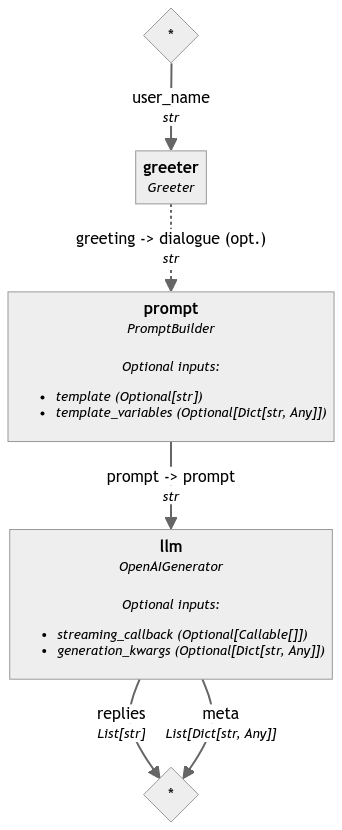

In [3]:
dialogue_builder.show()

In [4]:
dialogue = dialogue_builder.run({"greeter": {"user_name": "Tuana"}})

print(dialogue["llm"]["replies"][0])

Characters: Tuana, Sara

(Stage set with a living room, Tuana is sitting on the sofa reading a book when Sara enters)

Sara: Hello Tuana.

Tuana: Oh, hi Sara! What brings you here today?

Sara: I just wanted to see how you were doing. It's been a while since we've caught up.

Tuana: I'm good, thanks for asking. How about you?

Sara: I'm doing alright. Just trying to stay busy with work and everything. How's your book?

Tuana: It's great, actually. I can't seem to put it down.

Sara: That's awesome. Mind if I sit down?

Tuana: Of course, make yourself at home. (Sara sits down next to Tuana)

Sara: So, what else have you been up to lately?

Tuana: Not much, just the usual. How about you? Any exciting plans coming up?

Sara: Well, actually, I was thinking of planning a trip soon. Maybe we could go together?

Tuana: That sounds like a great idea! I would love to go on an adventure with you.

Sara: Perfect. Let's start planning then.

(They both smile at each other as the lights dim on the 

### Build the Hacker News Summarizer